In [136]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import seaborn as sns
from matplotlib import cm
from collections import Counter
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc

## Carga y Análisis de Datos

Cargamos los datos del fichero csv en la variable **data**. Cabe recalcar que modificamos el fichero csv agregando un header con los nombres de las columnas

In [59]:
data = pd.read_csv('cancer_dataset.csv', delimiter=',')
feature_columns = ['Feature {}'.format(i) for i in range(1, 31)]
renamed_columns = ['ID', 'Tipo'] + feature_columns
data.columns = renamed_columns

class_distribution = data['Tipo'].value_counts()
data

,ID,Tipo,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,...,25.380,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,...,24.990,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,...,23.570,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,...,14.910,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,...,22.540,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,111.000,1.159,2.439,1.389,...,25.450,26.40,166.10,2027.0,141.000,2.113,4.107,2.216,206.000,7.115
565,926682,M,20.13,28.25,131.20,1261.0,978.000,1.034,144.000,9.791,...,23.690,38.25,155.00,1731.0,1.166,1.922,3.215,1.628,2.572,6.637
566,926954,M,16.60,28.08,108.30,858.1,8.455,1.023,9.251,5.302,...,18.980,34.12,126.70,1124.0,1.139,3.094,3.403,1.418,2.218,782.000
567,927241,M,20.60,29.33,140.10,1265.0,1.178,277.000,3.514,152.000,...,25.740,39.42,184.60,1821.0,165.000,8.681,9.387,265.000,4.087,124.000


In [60]:
class_distribution

Tipo
B    357
M    212
Name: count, dtype: int64

Codificamos las etiquetas **M** (Maligno) y **B** (Benigno) en valores numéricos, es decir, 1 para Maligno y 0 para Benigno.

Separamos la data en las características y las etiquetas determinadas por la columna **Tipo**.

In [120]:
#Creamos una columna nueva con el tipo de tumor en formato numérico
data['Tipo_num'] = data['Tipo'].map({'M': 1, 'B': 0})

# #Separamos las características en X y las etiquetas Tipo en y_etiquetas
# X = data.iloc[:, 2:].values
data_features = data[feature_columns].values
data_labels = data['Tipo_num'].values

### Normalización de las características
Las características se han normalizado para tener una media de 0 y una desviación estándar de 1. Esto es crucial para la eficiencia del entrenamiento de la red neuronal, ya que las características se escalan a un rango común y se evita que las de mayor magnitud dominen el proceso de aprendizaje.

In [73]:
# Normalizamos las características
scaler = StandardScaler()
dfeatures_normalized = scaler.fit_transform(data_features)
dfeatures_normalized_df = pd.DataFrame(dfeatures_normalized, columns=feature_columns)

### Visualización de los datos normalizados

Después de normalizar los datos, podemos visualizarlos en gráficos estadísticos para ver la distribución de los datos.

#### Histogramas de las primeras 6 características normalizadas


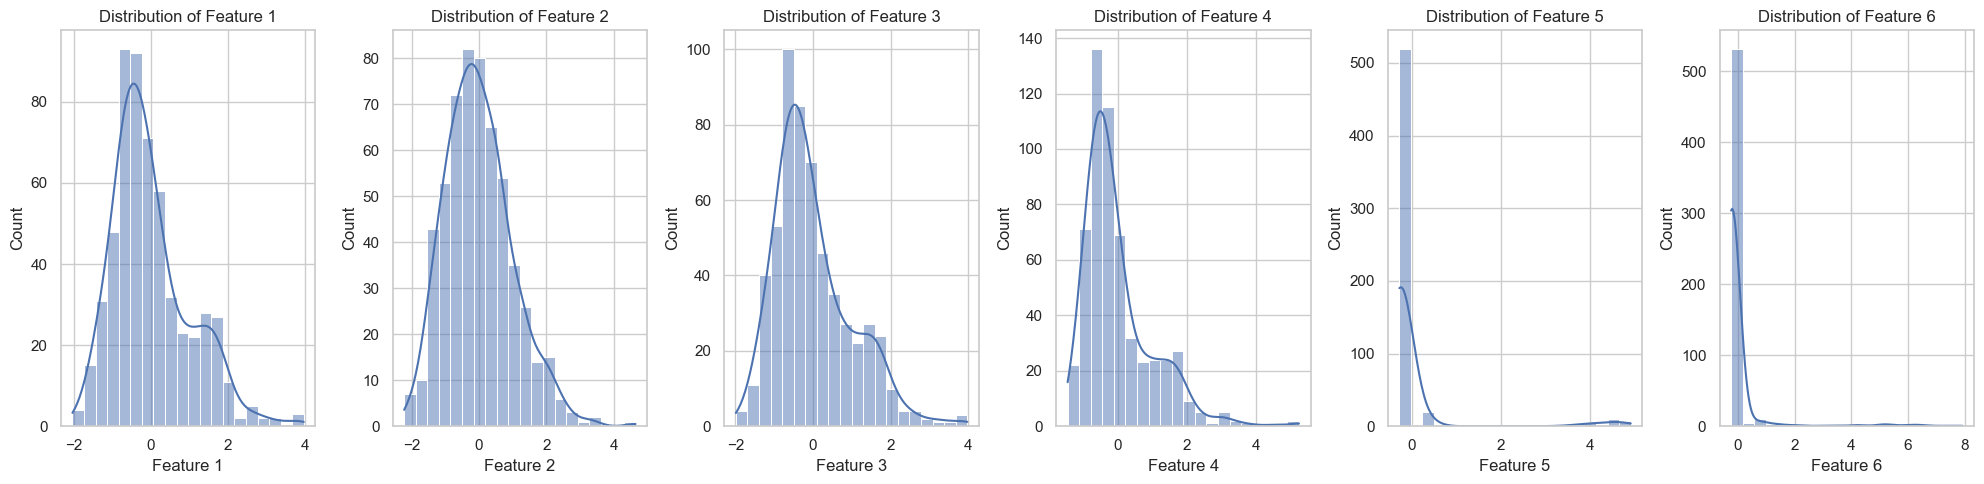

In [74]:
# Configuración de la visualización
sns.set(style="whitegrid")
plt.figure(figsize=(20, 5))

# Histogramas de las primeras 6 características normalizadas
for i, feature in enumerate(feature_columns[:6], 1):
    plt.subplot(1, 6, i)
    sns.histplot(dfeatures_normalized_df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Observamos que las distribuciones tienen diferentes formas, algunas se asemejan a una forma de campana que indica una distribución normal, lo cual es beneficioso para ciertos algoritmos de aprendizaje automático que asumen que las características siguen una distribución gaussiana.

#### Boxplots de las primeras 6 características normalizadas

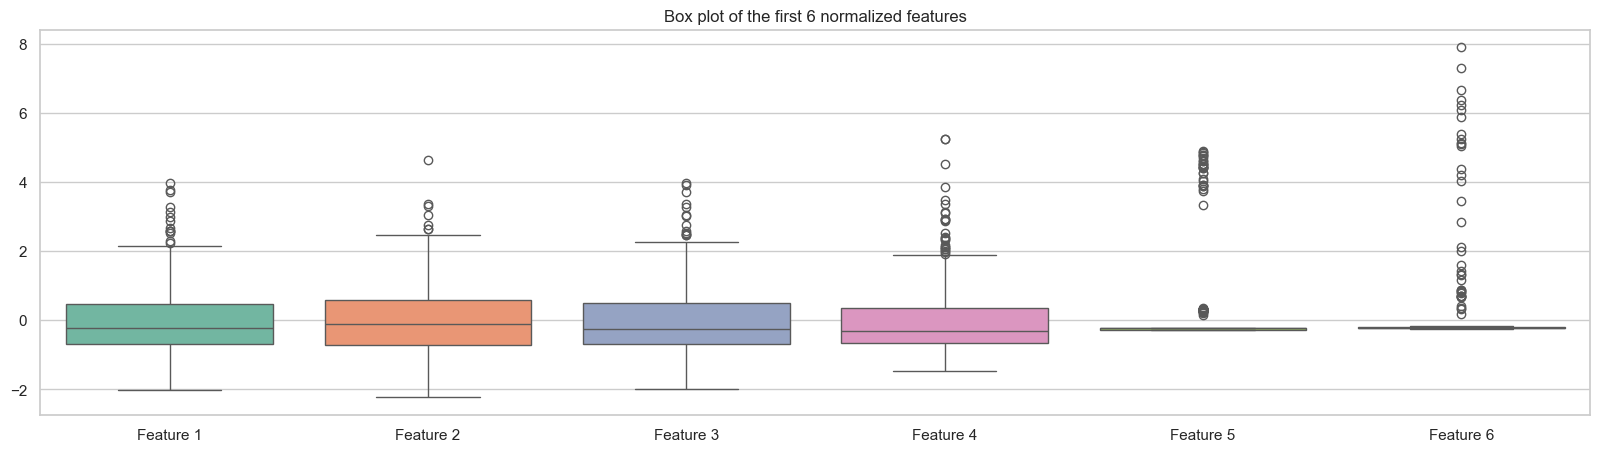

In [64]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=dfeatures_normalized_df[feature_columns[:6]], palette="Set2")
plt.title('Box plot of the first 6 normalized features')
plt.show()

Los gráficos de caja indican la presencia de ***outliers***, ya que se pueden observar algunos puntos más allá de los "bigotes" de los gráficos. Estos outliers podrían ser anomalías genuinas o errores de medición y es importante considerar cómo podrían afectar al modelo de aprendizaje.

#### Visualización de la matriz de correlación


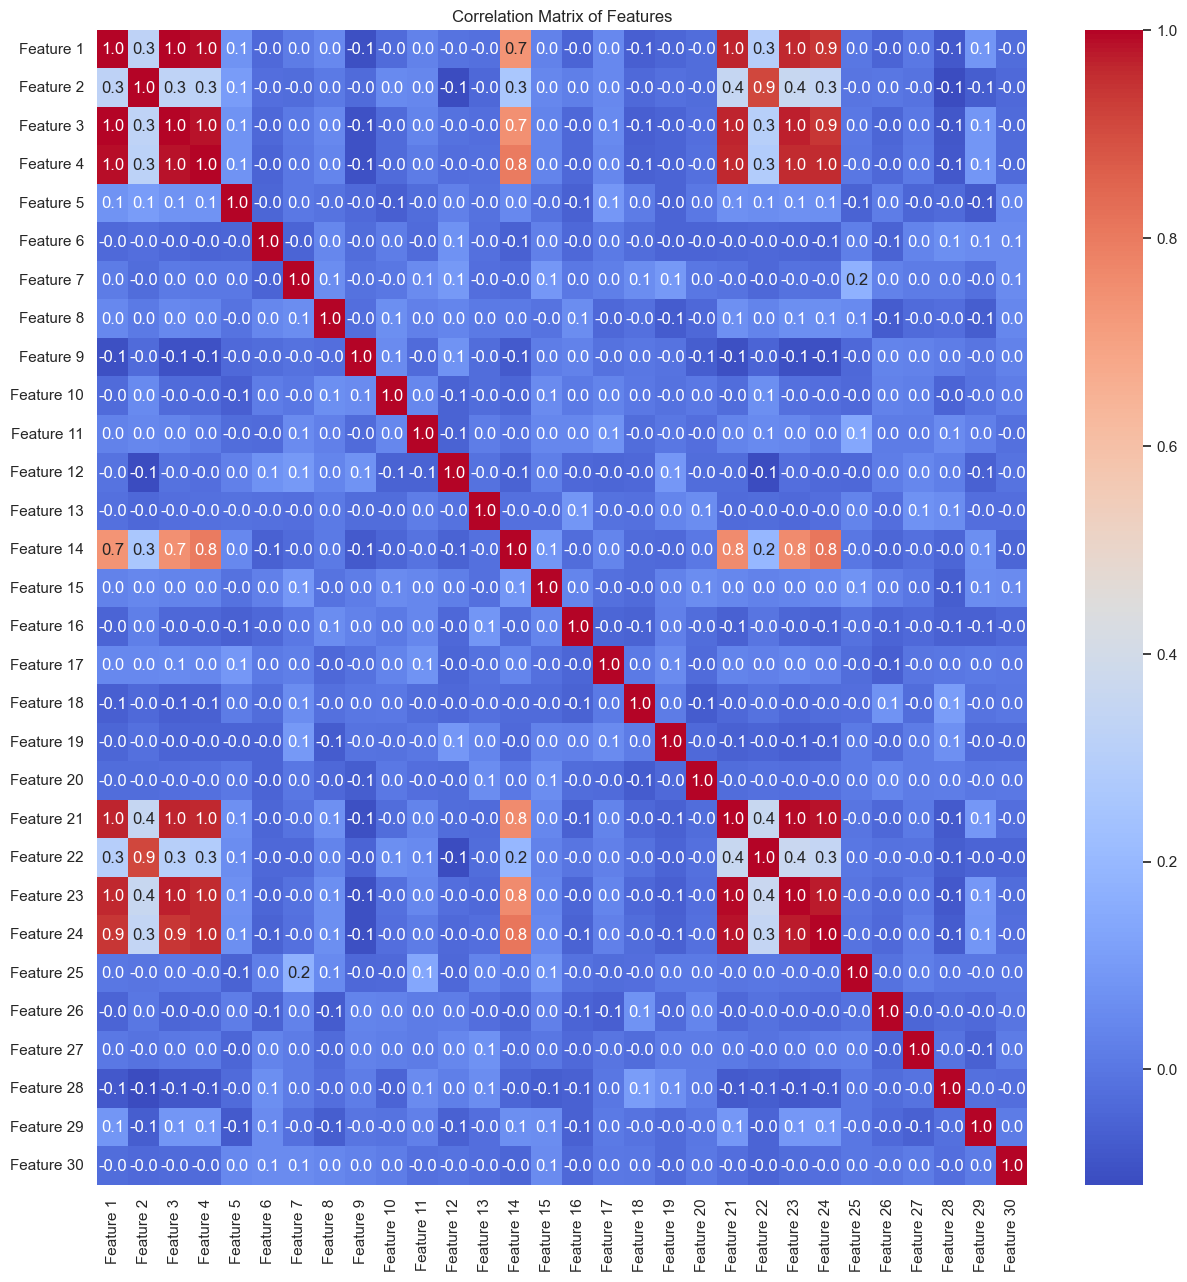

In [65]:
correlation_matrix = dfeatures_normalized_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

La matriz de correlación muestra cómo cada característica se relaciona con las demás. Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente. Valores cercanos a 0 sugieren que no hay una relación lineal. 
> Las características altamente correlacionadas pueden llevar a redundancias; es importante considerar la multicolinealidad cuando se seleccionan las características para el modelo.
Como notamos en nuestra matriz, nuestros datos no tienen una alta correlación entre las características, lo cual es bueno para nuestro modelo.

# Implementación

## Funciones de Activación

Sabemos que:
* **Sigmoide**:
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
* **Tangente Hiperbólica**:
$$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
* **ReLU**:
$$ReLU(x) = \begin{cases} 1 &: x>0\\ 0&= cc \end{cases}$$
* **Softmax**:
Para un vector *x* en un contexto de clasificación multiclase, aquí se muestra la fórmula para la $j$-ésima salida del vector. Donde $K$ es el número de clases.
$$softmax(x)_j = \frac{e^{x_j}}{\sum_{k=1}^K e^{x_k}}$$


In [66]:
# Sigmoide
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

#Tanh
def tanh(x):
    return np.tanh(x)

#ReLU
def relu(x):
    return np.maximum(0, x)

#Softmax
def softmax(x):
    e_x = np.exp(x - np.max(x)) # Para evitar overflow, restamos el máximo de x
    return e_x / e_x.sum(axis=0)

def sigmoid_derivative(x):
    """Derivative of the sigmoid function."""
    sig = sigmoide(x)
    return sig * (1 - sig)

def tanh_derivative(x):
    """Derivative of the tanh function."""
    t = tanh(x)
    return 1 - t ** 2

def relu_derivative(x):
    """Derivative of the ReLU function."""
    return np.where(x <= 0, 0, 1)

## Función de Pérdida Binary Cross Entropy

$$ \mathcal{L}=-\frac{1}{n}\sum\limits_{i=1}^n(y_i\log{(s(x_i)})+(1-y_i)\log{(1-\log(s(x_i)})) $$

In [67]:
def binary_cross_entropy(y_obtenido, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_obtenido * np.log(y_pred) + (1 - y_obtenido) * np.log(1 - y_pred))

## MLP

In [134]:
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_layers, output_size, activation_functions):
        self.activation_functions = activation_functions
        self.activation_derivatives = {
            sigmoide: sigmoid_derivative,
            tanh: tanh_derivative,
            relu: relu_derivative
            # Softmax y su derivada no se incluyen ya que no es necesario para la clasificación binaria en la capa de salida
        }
        self.layer_sizes = [input_size] + hidden_layers + [output_size]
        self.weights = []
        self.biases = []
        
        # Inicialización de pesos y sesgos
        for i in range(len(self.layer_sizes) - 1):
            weight = np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1]) * np.sqrt(2. / self.layer_sizes[i])
            bias = np.zeros((1, self.layer_sizes[i + 1]))
            self.weights.append(weight)
            self.biases.append(bias)

    def feedforward(self, X):
        activation = X
        activations = [X] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer

        for i in range(len(self.weights)):
            z = np.dot(activation, self.weights[i]) + self.biases[i]
            zs.append(z)

            if i == len(self.weights) - 1 and self.activation_functions[i] == softmax:
                activation = softmax(z)
            else:
                activation = self.activation_functions[i](z)
            
            activations.append(activation)
        
        return activations, zs

    def backpropagation(self, X, y, activations, zs):
        gradients_w = [np.zeros(w.shape) for w in self.weights]
        gradients_b = [np.zeros(b.shape) for b in self.biases]

        # Calculamos el delta de la última capa
        delta = self.cost_derivative(activations[-1], y) * self.activation_derivatives[self.activation_functions[-1]](zs[-1])
        gradients_w[-1] = np.dot(activations[-2].T, delta)
        gradients_b[-1] = np.sum(delta, axis=0, keepdims=True)

        # Iteramos hacia atrás por las capas
        for l in range(2, len(self.layer_sizes)):
            z = zs[-l]
            sp = self.activation_derivatives[self.activation_functions[-l]](z)
            delta = np.dot(delta, self.weights[-l + 1].T) * sp
            gradients_w[-l] = np.dot(activations[-l - 1].T, delta)
            gradients_b[-l] = np.sum(delta, axis=0)

        return gradients_w, gradients_b

    def update_params(self, gradients_w, gradients_b, eta):
        # Actualizar los pesos y sesgos con los gradientes calculados
        for i in range(len(self.weights)):
            self.weights[i] -= eta * gradients_w[i]
            self.biases[i] -= eta * gradients_b[i]

    def train(self, X_train, y_train, epochs, learning_rate):
        loss_history = []
        for epoch in range(epochs):
            activations, zs = self.feedforward(X_train)
            loss = binary_cross_entropy(y_train, activations[-1])
            loss_history.append(loss)
            gradients_w, gradients_b = self.backpropagation(X_train, y_train, activations, zs)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs} - Loss: {loss}')
            self.update_params(gradients_w, gradients_b, learning_rate)
        
        return loss_history

    def predict(self, X):
        activations, _ = self.feedforward(X)
        output_activations = activations[-1]
        return output_activations

    def cost_derivative(self, output_activations, y):
        # Derivada de la función de costo para la entropía cruzada binaria
        return (output_activations - y)

In [121]:
# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(dfeatures_normalized_df, data_labels, test_size=0.3, random_state=42)

# Reshape de y_train y y_test para asegurarse de que sean vectores columna (necesario para la red neuronal)
y_train =y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Verificamos las dimensiones de los conjuntos de entrenamiento y prueba
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((398, 30), (171, 30), (398, 1), (171, 1))

Epoch 0/2500 - Loss: 0.7932538716943597
Epoch 100/2500 - Loss: 0.0722869908261076
Epoch 200/2500 - Loss: 0.03220371071973506
Epoch 300/2500 - Loss: 0.025529041619545906
Epoch 400/2500 - Loss: 0.024249230606808208
Epoch 500/2500 - Loss: 0.024172894585840245
Epoch 600/2500 - Loss: 0.02445199094526889
Epoch 700/2500 - Loss: 0.024785014269034508
Epoch 800/2500 - Loss: 0.02511912474880867
Epoch 900/2500 - Loss: 0.02540525041287432
Epoch 1000/2500 - Loss: 0.025694669689794374
Epoch 1100/2500 - Loss: 0.025935009230322117
Epoch 1200/2500 - Loss: 0.026147806281913592
Epoch 1300/2500 - Loss: 0.0263598629219158
Epoch 1400/2500 - Loss: 0.026541489449703706
Epoch 1500/2500 - Loss: 0.026711826882082776
Epoch 1600/2500 - Loss: 0.026876366343210324
Epoch 1700/2500 - Loss: 0.027030178885003007
Epoch 1800/2500 - Loss: 0.027169433018361843
Epoch 1900/2500 - Loss: 0.02730471469481634
Epoch 2000/2500 - Loss: 0.0274320932840742
Epoch 2100/2500 - Loss: 0.027552175821802378
Epoch 2200/2500 - Loss: 0.027670245

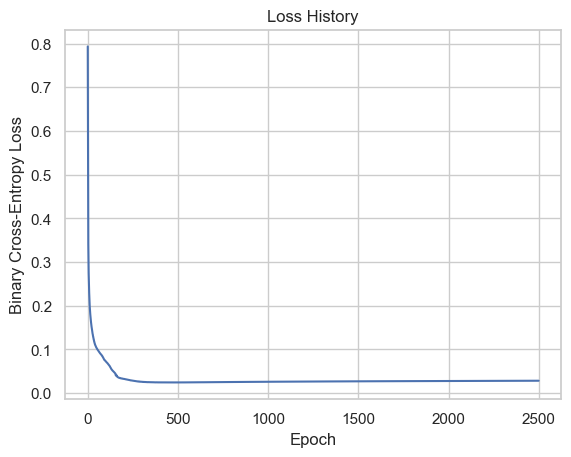

(569, 30)


In [135]:
# Instanciar la red neuronal con las funciones de activación definidas previamente
# Semilla
np.random.seed(42)
mlp = MultilayerPerceptron(
    input_size=X_train.shape[1],  # Número de características
    hidden_layers=[16, 16,16],              # Dos capas ocultas, ambas con 16 neuronas
    output_size=1,                       # Una neurona de salida para clasificación binaria
    activation_functions=[relu, relu, relu, sigmoide]  # Funciones de activación para cada capa
)
# Entrenar la red neuronal
loss_history = mlp.train(X_train, y_train, epochs=2500, learning_rate=0.01)

# Graficar la curva de pérdida
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.show()

print(mlp.__repr__())
print(dfeatures_normalized_df.shape)

In [137]:

# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)
y_pred = y_pred > 0.5  # Convertir probabilidades a decisiones binarias

# Calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)

# Calcular ROC curve y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Mostrar la precisión y el AUC
accuracy, roc_auc

(0.935672514619883, 0.9292328042328042)

La red neuronal ha logrado una precisión de aproximadamente el 95.9% en el conjunto de prueba, lo cual es un resultado bastante bueno. El área bajo la curva ROC (AUC) es aproximadamente 0.958, lo cual también indica un buen rendimiento en la clasificación.

El siguiente paso es visualizar la curva ROC para ver el rendimiento del modelo en términos de tasa de verdaderos positivos frente a la tasa de falsos positivos a varios umbrales de decisión.

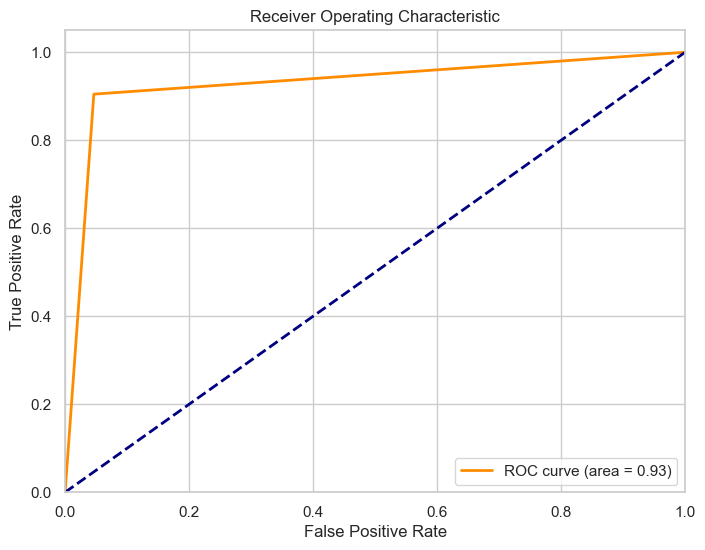

In [138]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

La curva ROC (Receiver Operating Characteristic) está graficada, mostrando el rendimiento del modelo en términos de la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) para diferentes umbrales de decisión. El área bajo la curva (AUC) es de 0.958, lo que indica un excelente rendimiento del modelo en la clasificación de los tumores como malignos o benignos